In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sheet1 = pd.read_excel(r"C:\Users\Beatrice\Desktop\School Files\BSPE - Second Year\GarqueBelleBeatrice_Finals.xlsx", engine="openpyxl")
print(sheet1.head())

      Name            Nick Name             Classes  Blue Essence   RP  \
0   Aatrox     The darkin blade          Juggernaut          4800  880   
1     Ahri  The nine-tailed fox               Burst          3150  790   
2    Akali   The rogue assassin            Assassin          3150  790   
3   Akshan   The rogue sentinel  Marksman  Assassin          4800  880   
4  Alistar         The minotaur            Vanguard          1350  585   

          Difficulty  Difficulty (Numeric)     Role Range type Resourse type  \
0           Advanced                     4      Top      Melee    Blood Well   
1       Intermediate                     2   Middle     Ranged          Mana   
2             Expert                     5   Middle      Melee        Energy   
3  Intermediate_Plus                     3   Middle     Ranged          Mana   
4             Novice                     0  Support      Melee          Mana   

   Base HP  Base mana  
0      650          0  
1      590        418  
2 

In [165]:
# Proof that the data is clean
def check_dataset_quality(sheet1, required_points=100):
    print(f"Rows: {len(sheet1)}")
    print(f"Columns: {sheet1.shape[1]}")
    print("\nMissing values per column:\n", sheet1.isnull().sum())
    print(f"\nTotal missing values: {sheet1.isnull().sum().sum()}")
    print(f"Duplicate rows: {sheet1.duplicated().sum()}")

    if len(sheet1) >= required_points and sheet1.isnull().sum().sum() == 0:
        print("\n Dataset is clean and contains at least", required_points, "data points.")
    else:
        print("\n Dataset may be incomplete or too small.")
check_dataset_quality(sheet1)

Rows: 169
Columns: 12

Missing values per column:
 Name                    0
Nick Name               0
Classes                 0
Blue Essence            0
RP                      0
Difficulty              0
Difficulty (Numeric)    0
Role                    0
Range type              0
Resourse type           0
Base HP                 0
Base mana               0
dtype: int64

Total missing values: 0
Duplicate rows: 0

 Dataset is clean and contains at least 100 data points.


In [201]:
# Five Operations Using NumPy

# RP
RP = sheet1['RP'].to_numpy()

mean_RP = np.mean(RP)
median_RP = np.median(RP)
std_RP = np.std(RP)
min_RP = np.min(RP)
max_RP = np.max(RP)
sum_RP = np.sum(RP)

print("\nRP Statistics:")
print(f"Mean RP: {mean_RP:.2f}")
print(f"Median RP: {median_RP:.2f}")
print(f"Standard Deviation RP: {std_RP:.2f}")
print(f"Minimum RP: {min_RP}")
print(f"Maximum RP: {max_RP}")
print(f"Total RP: {sum_RP}")

# Range Type
RangeType = sheet1['Range type'].to_numpy()

unique_types, counts = np.unique(RangeType, return_counts=True)
percentages = (counts / counts.sum()) * 100

print("\nRange Type Comparison:")
for r_type, pct in zip(unique_types, percentages):
    print(f"{r_type}: {pct:.2f}%")
    
# Champion Randomizer
random_champion = sheet1['Name'].to_numpy()

random_champion = np.random.choice(sheet1['Name'], size=1)

print("\nChampion Randomizer:")
print(random_champion)


RP Statistics:
Mean RP: 705.36
Median RP: 790.00
Standard Deviation RP: 219.55
Minimum RP: 260
Maximum RP: 975
Total RP: 119205

Range Type Comparison:
Melee: 52.07%
Ranged: 47.93%

Champion Randomizer:
['Urgot']


In [336]:
from scipy import stats

# T-Test: RP comparison between Melee and Ranged

t_stat, p_val = stats.ttest_ind(
    sheet1.query("`Range type` == 'Melee'")['RP'],
    sheet1.query("`Range type` == 'Ranged'")['RP'])
print(f"T-Test = {t_stat:.2f}, p = {p_val:.4f}")

# Shapiro-Wilk Test: Normality of RP distribution

shapiro_stat, shapiro_p = stats.shapiro(sheet1['RP'])
print(f"Shapiro-Wilk = {shapiro_stat:.2f}, p = {shapiro_p:.4f}")

T-Test = -0.66, p = 0.5098
Shapiro-Wilk = 0.78, p = 0.0000


In [227]:
# One Operation Using Statsmodels

# Define X (independent variable) and y (dependent variable)
X = sheet1['Difficulty (Numeric)']
y = sheet1['RP']

# Add constant (intercept) to X
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

print("\nLinear Regression Summary:")
print(model.summary())


Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                     RP   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     14.22
Date:                Wed, 21 May 2025   Prob (F-statistic):           0.000226
Time:                        15:43:26   Log-Likelihood:                -1144.1
No. Observations:                 169   AIC:                             2292.
Df Residuals:                     167   BIC:                             2298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cons

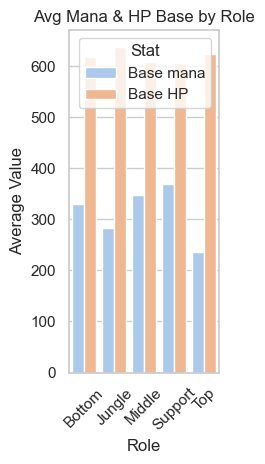

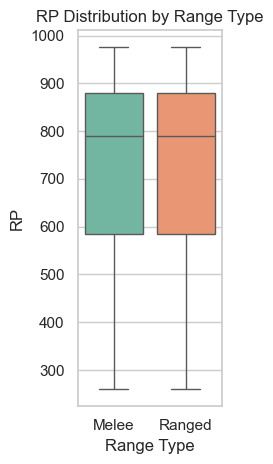

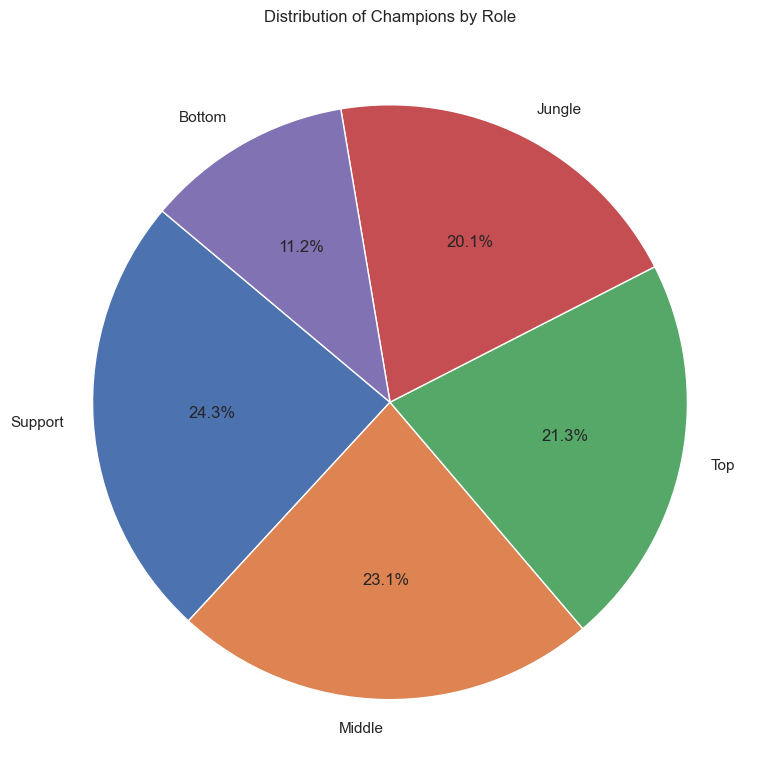

<Figure size 640x480 with 0 Axes>

In [332]:
# At least two visualizations

# Barplot: Average Mana Base and HP Base by Role
plt.subplot(1, 3, 2)

avg_stats = sheet1.groupby('Role')[['Base mana', 'Base HP']].mean().reset_index()
melted_stats = avg_stats.melt(id_vars='Role', var_name='Stat', value_name='Value')

sns.barplot(x='Role', y='Value', hue='Stat', data=melted_stats, palette='pastel')
plt.xticks(rotation=45)
plt.title('Avg Mana & HP Base by Role')
plt.xlabel('Role')
plt.ylabel('Average Value')

plt.tight_layout()
plt.show()

# Boxplot:  RP by Range Type
plt.subplot(1, 3, 3)

sns.boxplot(x='Range type', y='RP', data=sheet1, hue='Range type', palette='Set2', legend=False)
plt.title('RP Distribution by Range Type')
plt.xlabel('Range Type')
plt.ylabel('RP')

plt.tight_layout()
plt.show()

# Pie chart: Count of each role 
role_counts = sheet1['Role'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Champions by Role')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

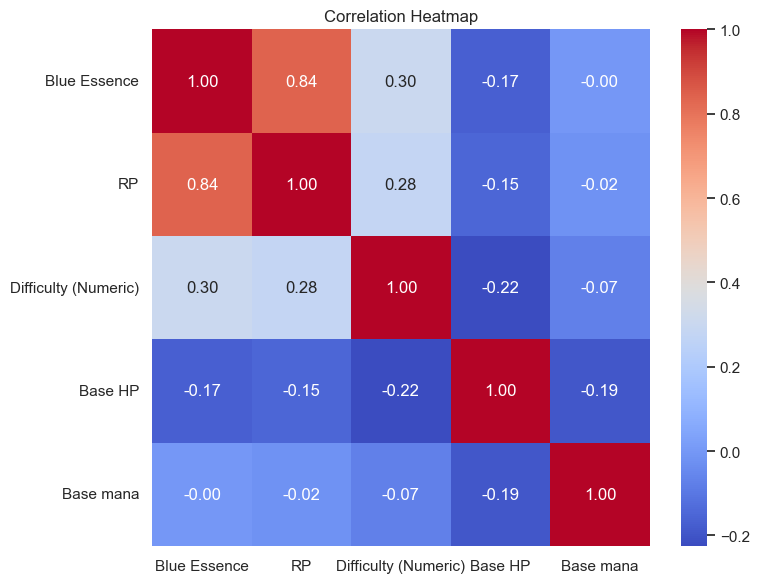

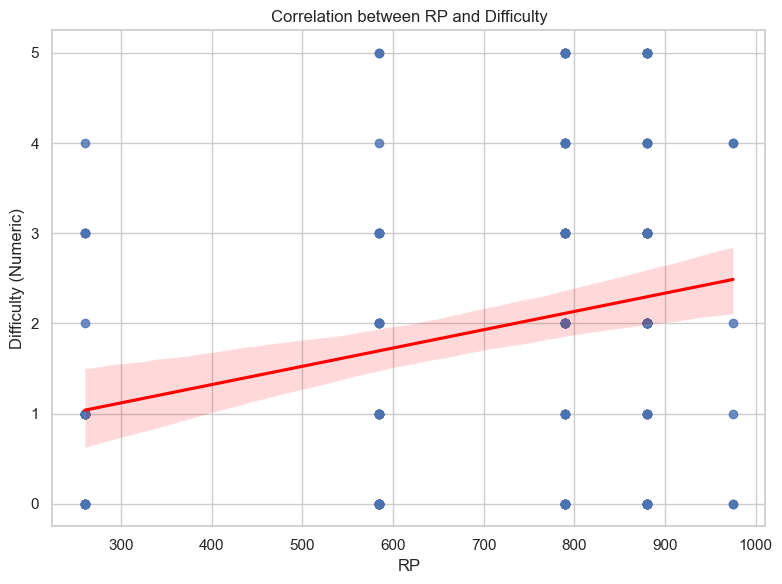

In [338]:
# Correlation Heatmap
numeric_data = sheet1.select_dtypes(include='number')

corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Scatter plot with regression line between RP and Difficulty
plt.figure(figsize=(8, 6))
sns.regplot(data=sheet1, x='RP', y='Difficulty (Numeric)', line_kws={"color": "red"})
plt.title('Correlation between RP and Difficulty')
plt.xlabel('RP')
plt.ylabel('Difficulty (Numeric)')
plt.tight_layout()
plt.show()